In [ ]:
import pandas
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import imghdr
import os

In [ ]:
data_dir="data"

In [ ]:
image_extension=["jpeg","jpg","bmp","png"]

In [ ]:
os.listdir(os.path.join(data_dir,"happy"))[0:4]
os.listdir(os.path.join(data_dir,"sad"))[0:4]

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            # image_data=cv2.imread(image_path)
            tail=imghdr.what(image_path)
            if tail not in image_extension:
                print(f"{image_path} is inavlid")
                os.remove(image_path)
        except:
            print(f"Issue with the image {image_path}")
            

In [ ]:
happy_image=[]
sad_image=[]
for image_class in os.listdir(data_dir):
    if image_class.startswith("happy"):
        for image in os.listdir(os.path.join(data_dir,image_class)):
            happy_image.append(os.path.join(data_dir,image_class,image))
    else:
        for image in os.listdir(os.path.join(data_dir,image_class)):
            sad_image.append(os.path.join(data_dir,image_class,image))

In [ ]:

im=plt.imread(happy_image[0])
plt.imshow(im)

In [ ]:
im=plt.imread(sad_image[0])
plt.imshow(im)

In [ ]:
len(happy_image),len(sad_image)

## Load Data

In [ ]:
data=tf.keras.utils.image_dataset_from_directory("data")

In [ ]:
data_iteration=data.as_numpy_iterator()


In [ ]:
batch=data_iteration.next()

In [ ]:
#Class-0=Happy
#Class-1=Sad
batch[1]

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        print(i,j,[i * 2 + j])
        ax[i, j].imshow(batch[0][i * 2 + j].astype(int))
        ax[i, j].set_title(batch[1][i * 2 + j])
        ax[i, j].axis("off")
plt.show()


## Preprocess Data

In [ ]:
data=data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator=data.as_numpy_iterator()

In [ ]:
scaled_batch=scaled_iterator.next()

In [ ]:
plt.imshow(scaled_batch[0][5])

## Split Data

In [ ]:
len(data)

In [ ]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [ ]:
train_size,val_size,test_size

In [ ]:
#use take and skip function available in tf.data.dataset
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)


In [ ]:
len(train),len(test),len(val)

## Deep Model

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),1,activation="relu",input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,(3,3),1,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16,(3,3),1,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.summary()

## Train

In [ ]:
logdir="logs"

In [ ]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

## Plot Performance

In [ ]:
hist.history["loss"]

In [ ]:
plt.plot(hist.history["loss"],label="Train")
plt.plot(hist.history["val_loss"],label="Validation")
plt.legend()
plt.show()

In [ ]:
plt.plot(hist.history["accuracy"],label="Train")
plt.plot(hist.history["val_accuracy"],label="Validation")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X,y=test.as_numpy_iterator().next()

In [ ]:
y_hat=model.predict(X)

In [ ]:
len(y_hat)

In [ ]:
y_hat

In [ ]:
for i in range(len(y_hat)):
    if y_hat[i]>0.5:
        y_hat[i]=1
    else:
        y_hat[i]=0
       

In [ ]:
y_hat

In [ ]:
print(classification_report(y,y_hat))

## Prediction

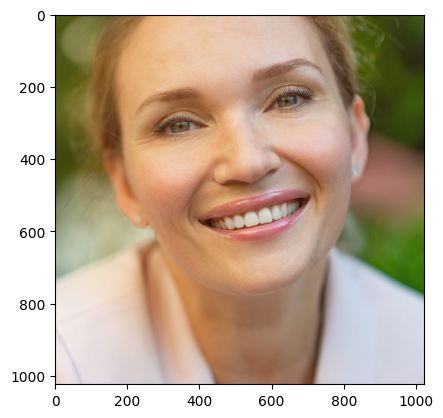

In [88]:
img=cv2.imread("happy.jpeg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGBA))

In [ ]:
import numpy as np

In [89]:
resize=tf.image.resize(img,(256,256))

In [90]:
expand=np.expand_dims(resize,0)

In [91]:
expand.shape

(1, 256, 256, 3)

In [94]:
resize.numpy()

array([[[ 19.  ,  87.  ,  80.  ],
        [ 19.  ,  87.  ,  80.  ],
        [ 19.  ,  87.  ,  80.  ],
        ...,
        [ 25.5 ,  89.5 ,  70.5 ],
        [ 23.75,  89.75,  70.75],
        [ 25.25,  92.  ,  72.75]],

       [[ 19.5 ,  87.  ,  80.  ],
        [ 19.5 ,  87.  ,  80.  ],
        [ 19.5 ,  87.  ,  80.  ],
        ...,
        [ 26.75,  90.25,  71.5 ],
        [ 26.  ,  90.5 ,  71.5 ],
        [ 24.5 ,  90.5 ,  71.5 ]],

       [[ 20.  ,  87.  ,  80.  ],
        [ 20.  ,  87.  ,  80.  ],
        [ 19.  ,  86.  ,  79.  ],
        ...,
        [ 25.25,  86.75,  68.75],
        [ 27.25,  89.75,  71.5 ],
        [ 26.25,  90.25,  71.25]],

       ...,

       [[206.5 , 216.5 , 234.5 ],
        [207.  , 215.25, 233.  ],
        [207.25, 215.25, 231.  ],
        ...,
        [223.  , 211.  , 211.  ],
        [222.5 , 210.5 , 210.5 ],
        [222.5 , 210.5 , 210.5 ]],

       [[199.25, 211.25, 229.25],
        [203.75, 214.25, 231.75],
        [206.5 , 216.5 , 232.  ],
        .

1/1 [==============================] - 0s 43ms/step


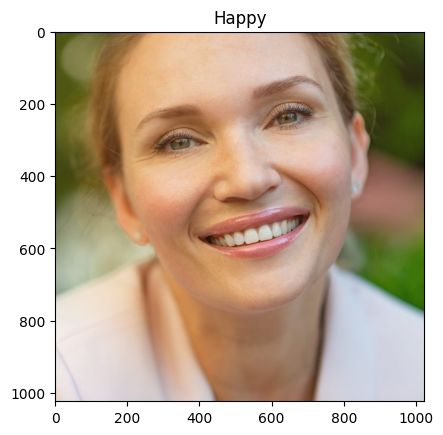

In [103]:
yhat=model.predict(np.expand_dims(resize/255.0,0))
if yhat > 0.5:
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title("Happy")
else:
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title("Sad")